# 建造一个神经网络

In [1]:
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 定义 add_layer()

在 Tensorflow 里定义一个添加层的函数可以很容易的添加神经层,为之后的添加省下不少时间.

神经层里常见的参数通常有weights、biases和激励函数。

定义添加神经层的函数def add_layer(),它有四个参数：输入值、输入的大小、输出的大小和激励函数，我们设定默认的激励函数是None。

    def add_layer(inputs, in_size, out_size, activation_function=None): 

接下来，我们开始定义weights和biases。

因为在生成初始参数时，随机变量(normal distribution)会比全部为0要好很多，所以我们这里的weights为一个in_size行, out_size列的随机变量矩阵。

    Weights = tf.Variable(tf.random_normal([in_size, out_size]))

在机器学习中，biases的推荐值不为0，所以我们这里是在0向量的基础上又加了0.1。

下面，我们定义Wx_plus_b, 即神经网络未激活的值。其中，tf.matmul()是矩阵的乘法。

    Wx_plus_b = tf.matmul(inputs, Weights) + biases

当activation_function——激励函数为None时，输出就是当前的预测值——Wx_plus_b，不为None时，就把Wx_plus_b传到activation_function()函数中得到输出。

    if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)

最后，返回输出，添加一个神经层的函数——def add_layer()就定义好了。

    return outputs

In [2]:
#           (输入数据, 前一个神经元个数, 下一层神经元个数, 激活函数)
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

## 导入数据

构建所需的数据。 这里的x_data和y_data并不是严格的一元二次函数的关系，因为我们多加了一个noise,这样看起来会更像真实情况。

In [3]:
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

利用占位符定义我们所需的神经网络的输入。 tf.placeholder()就是代表占位符，这里的None代表无论输入有多少都可以，因为输入只有一个特征，所以这里是1。

In [4]:
# 请在这里输入  x,y 样本标签
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

## 搭建网络

接下来，我们就可以开始定义神经层了。 通常神经层都包括输入层、隐藏层和输出层。这里的输入层只有一个属性， 所以我们就只有一个输入；隐藏层我们可以自己假设，这里我们假设隐藏层有10个神经元； 输出层和输入层的结构是一样的，所以我们的输出层也是只有一层。 所以，我们构建的是——输入层1个、隐藏层10个、输出层1个的神经网络。

下面，我们开始定义隐藏层,利用之前的add_layer()函数，这里使用 Tensorflow 自带的激励函数tf.nn.relu。

In [5]:
# 请在这里添加第一层网络
Z1 = add_layer(xs, 1, 10, tf.nn.tanh)

接着，定义输出层。此时的输入就是隐藏层的输出——l1，输入有10层（隐藏层的输出层），输出有1层。

In [6]:
# 请在这里添加第二层网络
Z2 = add_layer(Z1, 10, 1, tf.nn.tanh)
prediction = Z2

计算预测值prediction和真实值的误差，对二者差的平方求和再取平均。

In [7]:
# 请在这里实现 损失函数
loss = tf.reduce_mean(tf.square(ys - prediction))

接下来，是很关键的一步，如何让机器学习提升它的准确率。tf.train.GradientDescentOptimizer()中的值通常都小于1，这里取的是0.1，代表以0.1的效率来最小化误差loss。

In [8]:
# 请在这里 使用梯度下降法最小化误差以此来更新 权重
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

## 启动会话

使用变量时，都要对它进行初始化，这是必不可少的。

In [9]:
# 请在这里 初始化变量  
init = tf.global_variables_initializer()

定义Session，并用 Session 来执行 init 初始化步骤。 （注意：在tensorflow中，只有session.run()才会执行我们定义的运算。）

In [10]:
# 启动会话
sess = tf.Session()
sess.run(init)

##  训练

下面，让机器开始学习。

比如这里，我们让机器学习1000次。机器学习的内容是train_step, 用 Session 来 run 每一次 training 的数据，逐步提升神经网络的预测准确性。 (注意：当运算要用到placeholder时，就需要feed_dict这个字典来指定输入。)

In [11]:
for step in range(1000):
    sess.run(train,feed_dict={xs:x_data,ys:y_data})

通过上图可以看出，误差在逐渐减小，这说明机器学习是有积极的效果的。

In [12]:
# 获取预测值
prediction_value = sess.run(prediction, feed_dict={xs:x_data})
prediction_value

array([[ 0.37175405],
       [ 0.36607954],
       [ 0.36031455],
       [ 0.35445896],
       [ 0.34851223],
       [ 0.34247443],
       [ 0.33634472],
       [ 0.33012304],
       [ 0.32380956],
       [ 0.3174039 ],
       [ 0.3109063 ],
       [ 0.30431658],
       [ 0.29763508],
       [ 0.2908624 ],
       [ 0.2839982 ],
       [ 0.27704358],
       [ 0.26999822],
       [ 0.26286337],
       [ 0.2556396 ],
       [ 0.24832734],
       [ 0.24092796],
       [ 0.23344244],
       [ 0.22587149],
       [ 0.21821652],
       [ 0.21047893],
       [ 0.20265995],
       [ 0.19476138],
       [ 0.18678446],
       [ 0.17873102],
       [ 0.17060317],
       [ 0.16240299],
       [ 0.154132  ],
       [ 0.14579293],
       [ 0.13738766],
       [ 0.12891906],
       [ 0.12038954],
       [ 0.11180127],
       [ 0.10315739],
       [ 0.09446104],
       [ 0.08571441],
       [ 0.07692099],
       [ 0.06808421],
       [ 0.05920656],
       [ 0.05029201],
       [ 0.04134356],
       [ 0

## 结果可视化

matplotlib 可视化

构建图形，用散点图描述真实数据之间的关系。 （注意：plt.ion()用于连续显示。）

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

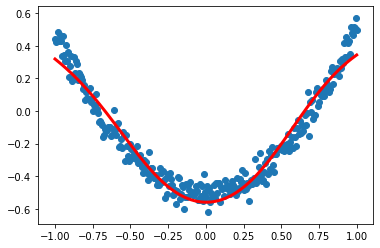

In [36]:
# 画图
plt.figure()
# plt.ion()  #interactive mode on
# 绘制样本点
plt.scatter(x_data, y_data)
# 预测结果用红色实线绘制
plt.plot(x_data, prediction_value,'r-',lw=3)
plt.pause(0.001)
plt.show()